# Machine Learning Lab 1: Introduction to Pandas

## 1. Introduction

In this lab, we will focus on introducing pandas, a powerful Python library for data manipulation and analysis. Pandas is an essential tool in the field of data science and machine learning, as it provides a wide range of functions and data structures to efficiently work with structured data.

Pandas simplifies this process by providing a user-friendly interface for handling datasets of various sizes and formats. Throughout this lab, we will cover the fundamental concepts and techniques of pandas, including:

- Loading and exploring data
- Data manipulation and transformation
- Data visualization
- Data aggregation and grouping
- Merging and joining data

## Loading and Exploring Data
In this section, we will learn how to load data into pandas from various sources and perform initial exploratory data analysis (EDA) using built-in pandas functions.

### Loading Data
Pandas provides functions to read data from different file formats. Let's explore a few common methods:

In [5]:
import pandas as pd

# Loading data from a CSV file
df = pd.read_csv('GEO-ML/Lab/data/automobile.csv')

# Loading data from an Excel file
df_excel = pd.read_excel('GEO-ML/Lab/data/automobile.xlsx', sheet_name='automobile')

In [6]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


### Exploring Data
Once the data is loaded into a pandas DataFrame, we can perform initial exploratory analysis using various functions:

In [ ]:
# Displaying the first few rows of the DataFrame
df.head()

In [ ]:
# Displaying the last few rows of the DataFrame
df.tail()

In [ ]:
# Getting information about the DataFrame
df.info()

In [ ]:
# Computing descriptive statistics of the DataFrame
df.describe()

## Cleaning


In [ ]:
# Find out the number of values which are not numeric
df['price'].str.isnumeric().value_counts()

#Setting the missing value to mean of price and convert the datatype to integer
price = df['price'].loc[df['price'] != '?']
pmean = price.astype(int).mean()
df['price'] = df['price'].replace('?',pmean).astype(int)
df['price'].head()

## Using map

In [7]:
import numpy as np
import pandas as pd

# List of columns to clean
columns_to_clean = ['price', 'horsepower', 'normalized-losses']

# Function to replace missing values with the mean
def replace_missing(x, mean_value):
    return mean_value if pd.isnull(x) or x == '?' else x

# Iterate over the columns to clean
for column in columns_to_clean:
    # Convert the column to numeric type, replacing non-numeric values with NaN
    numeric_values = pd.to_numeric(df[column], errors='coerce')
    
    # Calculate the mean value of the numeric values
    mean_value = int(np.nanmean(numeric_values))
    
    # Replace missing values with the mean using numpy.vectorize
    df[column] = np.vectorize(replace_missing)(df[column], mean_value).astype(int)
    
    print(f"Column '{column}' has been cleaned. Missing values replaced with the mean: {mean_value:.2f}")
    print(f"First few rows of cleaned '{column}' column:")
    df[column].head()

Column 'price' has been cleaned. Missing values replaced with the mean: 13207.00
First few rows of cleaned 'price' column:
Column 'horsepower' has been cleaned. Missing values replaced with the mean: 104.00
First few rows of cleaned 'horsepower' column:
Column 'normalized-losses' has been cleaned. Missing values replaced with the mean: 122.00
First few rows of cleaned 'normalized-losses' column:


In [4]:
import pandas as pd
import geoml as gml

# Reading again just for demonstration purposes only
df = pd.read_csv('GEO-ML/Lab/data/automobile.csv')

# List of columns to clean
columns_to_clean = ['price', 'horsepower', 'normalized-losses']

# Apply the function directly to each column using `.apply()`
df[columns_to_clean] = df[columns_to_clean].apply(gml.convert_and_impute_column)
df


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


## Some plots


<Axes: xlabel='engine-location', ylabel='price'>

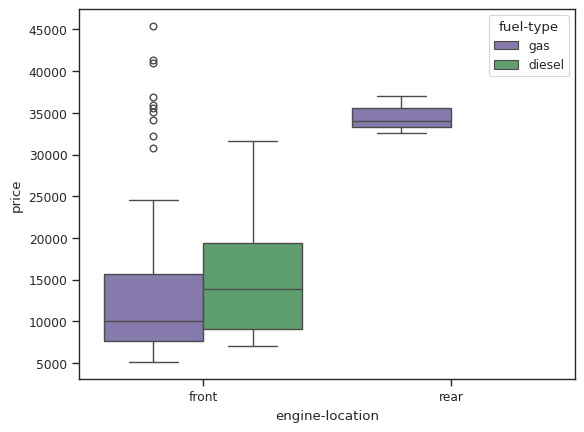

In [19]:
import matplotlib.pyplot as plt

import seaborn as sns


# Possible context [talk, paper, poster]
sns.set_context("paper")

sns.boxplot(x="engine-location", y="price", hue="fuel-type", palette=["m", "g"], data=df)
#sns.despine(offset=10, trim=True)

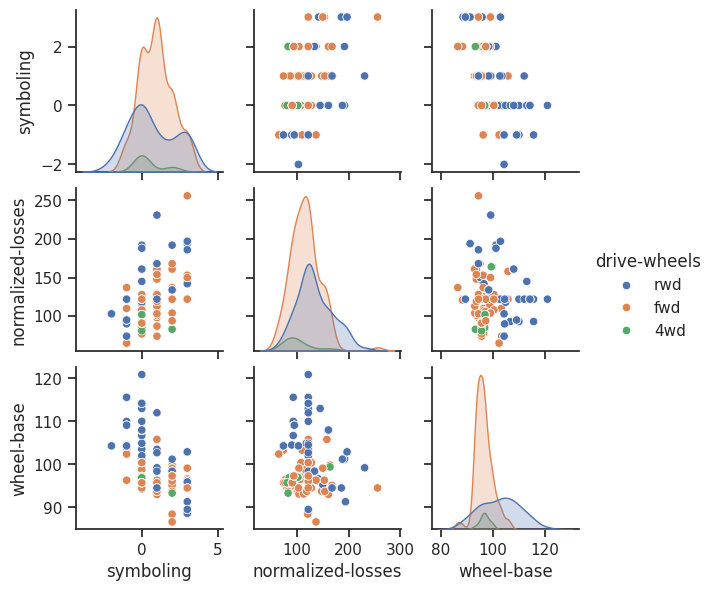

In [20]:
## Some multivariate 
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, height=2, vars = ['symboling', 'normalized-losses','wheel-base'], hue="drive-wheels")
plt.show()